<div align="right">Created On: Python [conda env:PY27_Test] &nbsp;</div>
<div align="right">Cross-Tested On: Python [conda env:PY36_clone]</div>

In [1]:
# Origin:  This code was edited from a Python class exercise into a reusable function
#          original code explicitely solved only one specific distribution and was not a function
# Versioning:  Tested in Python 2.7 and Python 3.6

import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import stats

def standNormProbDistrPlot(mean = 0, sigma = 1, stdDevRng=5, pLw=-3, pHi=3, titleStyle = "sigma",  
                       pLabelFontSz = 15, txtAdjLft=-1.9, txtAdjBtm=0.05, xyLabels=True, plotSize = [8,6]):
    ''' standNormProbDistrPlot() -->\n\nPlots a Normal Distribution w/ probability calculations. 
Default is standard normal (mean=0 / sigma = 1). Run with no arguments to see a default distribution plot.
Arguments:
  * mean, sigma = mean, sigma (note: sigma = sqrt(variance))
  * stdDevRng = standard deviation range for the distribution, defaults to mu +/- 5*sigma 
  * pLw, pHi = Probaility Low and high values; defaults would create:  p( -3 < x < 3 )
  * titleStyle = "sigma" | "variance" (controls the plot heading)
  * pLabelFontSz = font size for probability calculation title text; default = 15
  * xyLabels = T/F (turns xyLabels on or off), defaults to False
  * txtAdjLft, txtAdjBtm = use numbers to adjust position of probability statement from left and bottom of plot
  * plotSize = defaults to [8,6], use these numbers to adjust the plot size   '''
    
    mu = mean                                      # present "mean" to users of function, but use "mu" in the math
    variance = sigma**2
    x = np.arange(mu-5*sigma, mu+5*sigma, 0.1)     # build x axis values sampling for 5 standard deviations
                                                   # set range at mean +/- 5 Std/ Dev. increment by 0.1
    y = stats.norm.pdf(x, mu, sigma)               # build y axis values to go with this, pdf() = prob. dist. function
                                                   # from our x values we build standard normal distribution curve points
    
    plt.rcParams['figure.figsize'] = plotSize[0], plotSize[1]          
                                                   # set plot size
    plt.plot(x, y)                                 # completes plain distribution curve, but no shading at this point

                                                   # identifying points in our distribution for the shading/color fill:
    theta = np.linspace(pLw, pHi, 100)             #    * sampling between our probability range (100 = # of samples)
    r = stats.norm.pdf(theta, mu, sigma)           #    * build y values to go with x values
    theta = np.concatenate([[pLw], theta, [pHi]])  #    * add 2 extra points for x values (to extend shading to x axis)
    r = np.concatenate([[0], r, [0]])              #    * add the 2 y values which are zeroes


    plt.fill(theta, r, alpha = 0.3,)               # now this fills based on the shaded points we built above
    
    if titleStyle == "sigma":
        plt.title('Normal Distribution: $\mu$=%.2f, $\sigma^2=%.2f$'%(mu, variance))
    elif titleStyle == "variance":
        plt.title('Normal Distribution: $N(%d, %d)$'%(mu, variance))
    else:
        plt.title(titleStyle)
    
    plt.text(txtAdjLft, txtAdjBtm, 
             '$p(%d<x<%d)=%.4f$'%(pLw, pHi, stats.norm.cdf((pHi-mu)/sigma) - stats.norm.cdf((pLw-mu)/sigma)), 
             size = pLabelFontSz)
       # centering around mean and / std dev converts to z value to pass in the z-value to "standard normzlize" the distr.
       # mapping from x to z, the calculation in cdf() equation answers this probability question for range passed in:
       # p( pLw < x < pHi) = ?

    if xyLabels == True:
        plt.xlabel('x')
        plt.ylabel('Probability density')
        
    plt.show()

In [2]:
print(standNormProbDistrPlot.__doc__)

 standNormProbDistrPlot() -->

Plots a Normal Distribution w/ probability calculations. 
Default is standard normal (mean=0 / sigma = 1). Run with no arguments to see a default distribution plot.
Arguments:
  * mean, sigma = mean, sigma (note: sigma = sqrt(variance))
  * stdDevRng = standard deviation range for the distribution, defaults to mu +/- 5*sigma 
  * pLw, pHi = Probaility Low and high values; defaults would create:  p( -3 < x < 3 )
  * titleStyle = "sigma" | "variance" (controls the plot heading)
  * pLabelFontSz = font size for probability calculation title text; default = 15
  * xyLabels = T/F (turns xyLabels on or off), defaults to False
  * txtAdjLft, txtAdjBtm = use numbers to adjust position of probability statement from left and bottom of plot
  * plotSize = defaults to [8,6], use these numbers to adjust the plot size   


#### Testing of the Function

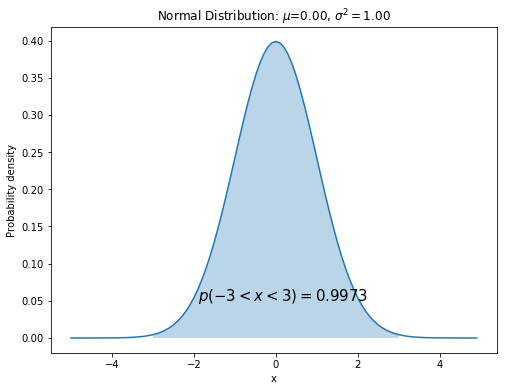

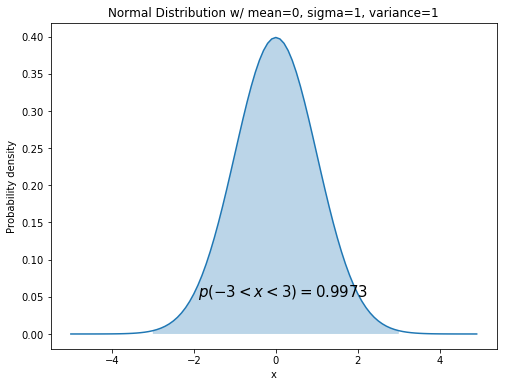

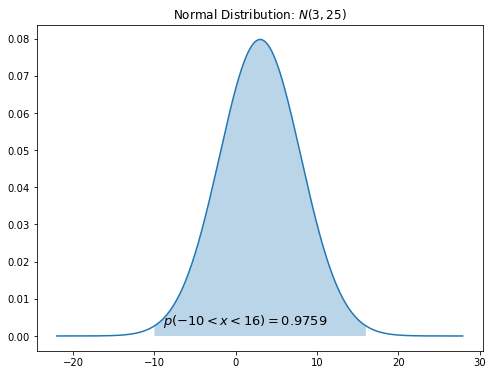

In [3]:
# show default plot:
standNormProbDistrPlot()

# change title on plot:
standNormProbDistrPlot(titleStyle = "Normal Distribution w/ mean=0, sigma=1, variance=1")

# requirements:  variance = 25, mean = 3, find probability p(-10 < x < 16) = ?
standNormProbDistrPlot(mean = 3, sigma = 5, stdDevRng=5, pLw=-10, pHi=16, titleStyle = "variance",  
                   pLabelFontSz = 13, txtAdjLft=-9, txtAdjBtm=0.003, xyLabels=False, plotSize = [8,6])

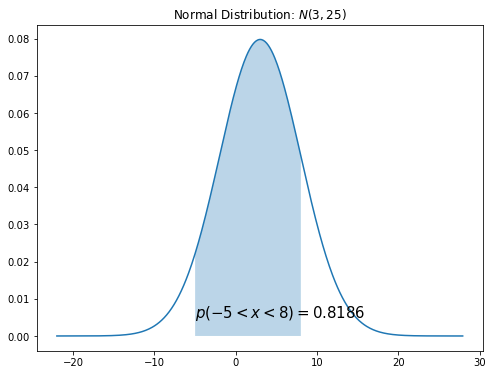

In [4]:
# test where probability range does not represent most of it:
#    requirements:  variance = 25, mean = 3, find probability p(-5 < x < 8) = ?
#    intuitively, this should produce a distribution like what is above but with smaller =? answer and shaded region
#    some other tweaks made to input arguments after looking at the output for cleaner drawing

standNormProbDistrPlot(mean = 3, sigma = 5, stdDevRng=5, pLw=-5, pHi=8, titleStyle = "variance",  
                   pLabelFontSz = 15, txtAdjLft=-5, txtAdjBtm=0.005, xyLabels=False, plotSize = [8,6])

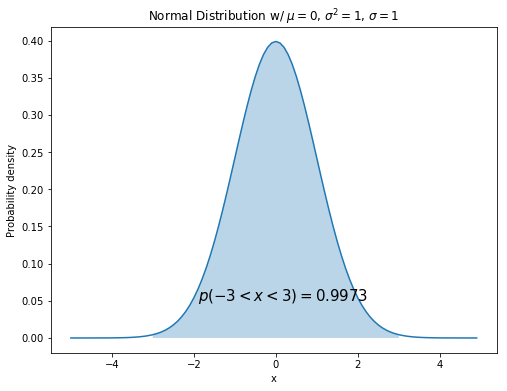

In [5]:
# change title on plot (use LaTex)
# because string goes into an element (plt.title) that can handle LaTex, this is possible for customization:
standNormProbDistrPlot(titleStyle = "Normal Distribution w/ $\mu=0$, $\sigma^2=1$, $\sigma=1$")